In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
print(f"Pandas version is {pd.__version__}")
print(f"Numpy version is {np.__version__}")
print(f"Seaborn version is {sns.__version__}")

Pandas version is 1.0.4
Numpy version is 1.18.5
Seaborn version is 0.10.1


In [6]:
df=pd.read_csv("/home/chaudha4/Projects/pyprojects/python-projects/data_analysis/ch03-medical-data-visualizer/medical_examination.csv")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df['overweight'] = df.weight/(df.height * df.height) * 10000
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,24.913495


In [8]:
# Normalize the data. If cholesterol, glucose is more than 1, set it to 1 (bad) else 0(good)
# print("\n weight type is ", type(df.weight))
df['overweight'] = np.where( (df.weight/(df.height ** 2) * 10000) > 25, 1, 0)
df.tail()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0,0


In [9]:
# Normalize the data. If cholesterol is more than 1, set it to 1 (bad) else 0(good)
df['cholesterol'] = np.where( df.cholesterol > 1, 1, 0 )
df.tail()
 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,0,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,2,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,1,1,0,0,1,0,0


In [10]:
# Normalize the data. If glucose is more than 1, set it to 1 (bad) else 0(good)
df['gluc'] = np.where( df.gluc > 1, 1, 0)
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,1,0,0,0,1,0,0


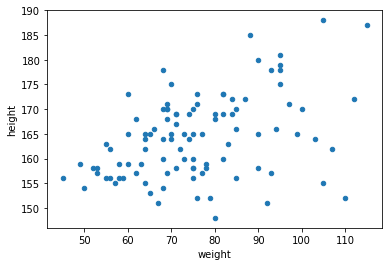

In [24]:
# Scatter plot for first 100 entries
df[:100].plot.scatter(y="height", x="weight")

In [31]:
data1 = [
         {'active': df.groupby('active').count().id[0],
          'cardio': df.groupby('cardio').count().id[0],
          'overweight': df.groupby('overweight').count().id[0],
          'alco': df.groupby('alco').count().id[0],
          'smoke': df.groupby('smoke').count().id[0],
          'gluc': df.groupby('gluc').count().id[0],
          'cholesterol': df.groupby('cholesterol').count().id[0],
         },
         {'active': df.groupby('active').count().id[1],
          'cardio': df.groupby('cardio').count().id[1],
          'overweight': df.groupby('overweight').count().id[1],
          'alco': df.groupby('alco').count().id[1],
          'smoke': df.groupby('smoke').count().id[1],
          'gluc': df.groupby('gluc').count().id[1],
          'cholesterol': df.groupby('cholesterol').count().id[1],
         }
        ]

In [33]:
df1 = pd.DataFrame(data1)
df1.head()

,active,cardio,overweight,alco,smoke,gluc,cholesterol
0,13739,35021,26454,66236,63831,59479,52385
1,56261,34979,43546,3764,6169,10521,17615


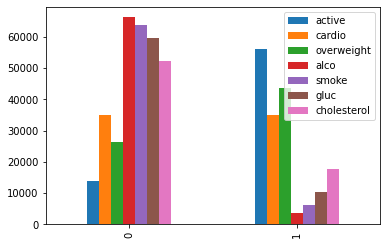

In [39]:
df1.plot.bar()

In [49]:
#data2 = pd.DataFrame(data1, index =["active","cardio","overweight","alco","smoke","gluc","cholesterol"])

df2 = df1.stack()
df2.head()

0  active        13739
   cardio        35021
   overweight    26454
   alco          66236
   smoke         63831
dtype: int64

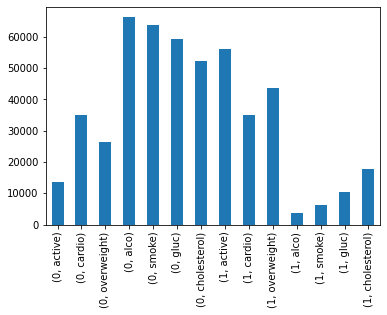

In [55]:
df2.plot.bar()


In [63]:
data3 = [
         {df.groupby('active').count().id[0],
          df.groupby('active').count().id[1]},
         {df.groupby('cardio').count().id[0],
          df.groupby('cardio').count().id[1]},
         {df.groupby('overweight').count().id[0],
          df.groupby('overweight').count().id[1]},
         {df.groupby('alco').count().id[0],
          df.groupby('alco').count().id[1]},
         {df.groupby('smoke').count().id[0],
          df.groupby('smoke').count().id[1]},
         {df.groupby('gluc').count().id[0],
          df.groupby('gluc').count().id[1]},
         {df.groupby('cholesterol').count().id[0],
          df.groupby('cholesterol').count().id[1]}
        ]

df3 = pd.DataFrame(data3, index =["active","cardio","overweight","alco","smoke","gluc","cholesterol"],
                   columns=["low", "high"])
df3.head()

,low,high
active,13739,56261
cardio,34979,35021
overweight,43546,26454
alco,3764,66236
smoke,6169,63831


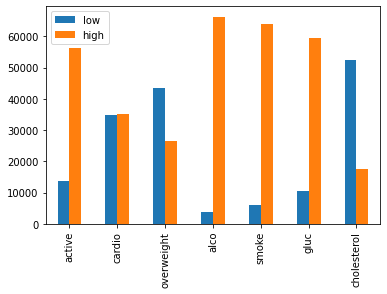

In [64]:
df3.plot.bar()

In [11]:
#df.count()
grouped = df.groupby('overweight')
grouped.describe()

id                                                      \
              count          mean           std  min       25%      50%   
overweight                                                                
0           26454.0  50003.228245  28924.654588  0.0  24997.00  49958.0   
1           43546.0  49953.703968  28806.966318  1.0  25009.25  50018.5   

                                  age                ... active        cardio  \
                75%      max    count          mean  ...    75%  max    count   
overweight                                           ...                        
0           75156.5  99999.0  26454.0  19177.268806  ...    1.0  1.0  26454.0   
1           74696.5  99998.0  43546.0  19646.009691  ...    1.0  1.0  43546.0   

                                                         
                mean       std  min  25%  50%  75%  max  
overweight                                               
0           0.398390  0.489576  0.0  0.0  0.0  1.0  1.0  
1           0.561246  0.496241  0.0  0.0  1.0  1.0  1.0  

[2 rows x 104 columns]

In [35]:
grouped.sum()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
overweight,,,,,,,,,,,,,
0,1322785400,507315469,36368,4380247,1662002.57,3296629,2362851,4690,0,2344,1209,21319,10539
1,2175283993,855505138,58121,7124899,3532395.73,5720581,4401278,12925,0,3825,2555,34942,24440


In [36]:
grouped.count()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
overweight,,,,,,,,,,,,,
0,26454,26454,26454,26454,26454,26454,26454,26454,26454,26454,26454,26454,26454
1,43546,43546,43546,43546,43546,43546,43546,43546,43546,43546,43546,43546,43546


In [37]:
df.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [140]:
# Since we want to group data by cholesterol", "gluc" etc, make everything else a row using melt
df_cat = pd.melt(df, id_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

# Now all other column appears as additonal row. Two new columns contain their identity (Variable, value)
df_cat

# Rows went up from 70k to 560k after melt !! Columns went down from 14 to 8 ( 6 + 2 new cols)
# 70 * 6 = 56k


,cholesterol,gluc,smoke,alco,active,overweight,variable,value
0,0,0,0,0,1,0,id,0.0
1,1,0,0,0,1,1,id,1.0
2,1,0,0,0,0,0,id,2.0
3,0,0,0,0,1,1,id,3.0
4,0,0,0,0,0,0,id,4.0
...,...,...,...,...,...,...,...,...
559995,0,0,1,0,1,1,cardio,0.0
559996,1,1,0,0,1,1,cardio,1.0
559997,1,0,0,1,0,1,cardio,1.0
559998,0,1,0,0,0,1,cardio,1.0


In [141]:
df_cat

,cholesterol,gluc,smoke,alco,active,overweight,variable,value
0,0,0,0,0,1,0,id,0.0
1,1,0,0,0,1,1,id,1.0
2,1,0,0,0,0,0,id,2.0
3,0,0,0,0,1,1,id,3.0
4,0,0,0,0,0,0,id,4.0
...,...,...,...,...,...,...,...,...
559995,0,0,1,0,1,1,cardio,0.0
559996,1,1,0,0,1,1,cardio,1.0
559997,1,0,0,1,0,1,cardio,1.0
559998,0,1,0,0,0,1,cardio,1.0


In [66]:
# We are only interested in cardio. So lets just get those rows.
df_cat = df_cat[(df_cat.variable == "cardio")]
df_cat

,cholesterol,gluc,smoke,alco,active,overweight,variable,value
490000,0,0,0,0,1,0,cardio,0.0
490001,1,0,0,0,1,1,cardio,1.0
490002,1,0,0,0,0,0,cardio,1.0
490003,0,0,0,0,1,1,cardio,1.0
490004,0,0,0,0,0,0,cardio,0.0
...,...,...,...,...,...,...,...,...
559995,0,0,1,0,1,1,cardio,0.0
559996,1,1,0,0,1,1,cardio,1.0
559997,1,0,0,1,0,1,cardio,1.0
559998,0,1,0,0,0,1,cardio,1.0


In [78]:
# Use Python timeit to see performace of the code.
timeit df_cat.groupby(["variable"]).count()

7.87 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [94]:
df_cat.groupby(["variable", "value"]).cholesterol.count()

variable  value
cardio    0.0      35021
          1.0      34979
Name: cholesterol, dtype: int64

In [104]:
# Number of Good cholesterol in df_cat. Sum works since True equates to 1 !! This will not work for other values like 3.
(df_cat["cholesterol"] == 0).sum()

52385

In [105]:
# Number of BAd cholesterol in df_cat
(df_cat["cholesterol"] == 1).sum()

17615

In [107]:
# Number of Good cholesterol in df_cat. ANother way
df_cat.loc[df_cat.cholesterol == 1, "cholesterol"].count()

17615

In [108]:
for data in df_cat.groupby(["variable", "value"]):
    print(data)

(('cardio', 0.0),         cholesterol  gluc  smoke  alco  active  overweight variable  value
490000            0     0      0     0       1           0   cardio    0.0
490004            0     0      0     0       0           0   cardio    0.0
490005            1     1      0     0       0           1   cardio    0.0
490006            1     0      0     0       1           1   cardio    0.0
490008            0     0      0     0       1           1   cardio    0.0
...             ...   ...    ...   ...     ...         ...      ...    ...
559987            0     0      0     0       1           0   cardio    0.0
559988            0     0      0     0       1           0   cardio    0.0
559991            1     1      0     0       1           1   cardio    0.0
559995            0     0      1     0       1           1   cardio    0.0
559999            1     0      0     0       1           0   cardio    0.0

[35021 rows x 8 columns])
(('cardio', 1.0),         cholesterol  gluc  smoke  alc

In [118]:
for data1, data2 in df_cat.groupby(["variable", "value"]):
    print(data1)
    print(type(data1))
    print("\n...\n")
    print(data2)
    print(type(data2))
    print("\n\n---------\n\n")

('cardio', 0.0)
<class 'tuple'>

...

        cholesterol  gluc  smoke  alco  active  overweight variable  value
490000            0     0      0     0       1           0   cardio    0.0
490004            0     0      0     0       0           0   cardio    0.0
490005            1     1      0     0       0           1   cardio    0.0
490006            1     0      0     0       1           1   cardio    0.0
490008            0     0      0     0       1           1   cardio    0.0
...             ...   ...    ...   ...     ...         ...      ...    ...
559987            0     0      0     0       1           0   cardio    0.0
559988            0     0      0     0       1           0   cardio    0.0
559991            1     1      0     0       1           1   cardio    0.0
559995            0     0      1     0       1           1   cardio    0.0
559999            1     0      0     0       1           0   cardio    0.0

[35021 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'

In [125]:
for name, group in df_cat.groupby(["variable", "value"]):
    # Number of Bad in each group
    print("cholesterol", (group["cholesterol"] == 1).sum() )
    print("gluc", (group["gluc"] == 1).sum() )
    print("smoke", (group["smoke"] == 1).sum() )
    print("alco", (group["alco"] == 1).sum() )
    print("active", (group["active"] == 1).sum() )
    print("overweight", (group["overweight"] == 1).sum() )
    print("\n\n---------\n\n")

cholesterol 5691
gluc 4127
smoke 3240
alco 1941
active 28643
overweight 19106


---------


cholesterol 11924
gluc 6394
smoke 2929
alco 1823
active 27618
overweight 24440


---------




In [126]:
df_cat.groupby(["variable", "value"]).get_group(('cardio', 0.0))

,cholesterol,gluc,smoke,alco,active,overweight,variable,value
490000,0,0,0,0,1,0,cardio,0.0
490004,0,0,0,0,0,0,cardio,0.0
490005,1,1,0,0,0,1,cardio,0.0
490006,1,0,0,0,1,1,cardio,0.0
490008,0,0,0,0,1,1,cardio,0.0
...,...,...,...,...,...,...,...,...
559987,0,0,0,0,1,0,cardio,0.0
559988,0,0,0,0,1,0,cardio,0.0
559991,1,1,0,0,1,1,cardio,0.0
559995,0,0,1,0,1,1,cardio,0.0


In [127]:
df_cat.groupby(["variable", "value"]).get_group(('cardio', 1.0))

,cholesterol,gluc,smoke,alco,active,overweight,variable,value
490001,1,0,0,0,1,1,cardio,1.0
490002,1,0,0,0,0,0,cardio,1.0
490003,0,0,0,0,1,1,cardio,1.0
490007,1,1,0,0,1,1,cardio,1.0
490015,0,0,0,0,0,1,cardio,1.0
...,...,...,...,...,...,...,...,...
559993,0,0,0,0,1,0,cardio,1.0
559994,0,0,0,0,1,1,cardio,1.0
559996,1,1,0,0,1,1,cardio,1.0
559997,1,0,0,1,0,1,cardio,1.0


In [151]:
df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


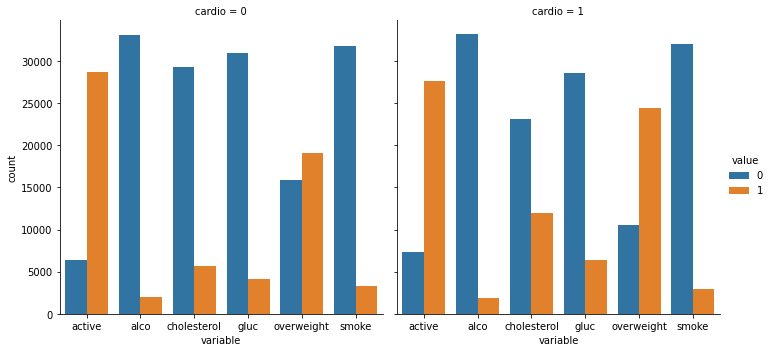

In [153]:

g = sns.catplot(data=df_cat, kind="count", x="variable", hue="value", col="cardio")


In [154]:
df_cat['total'] = 1
df_cat

,cardio,variable,value,total
0,0,active,1,1
1,1,active,1,1
2,1,active,0,1
3,1,active,1,1
4,0,active,0,1
...,...,...,...,...
419995,0,smoke,1,1
419996,1,smoke,0,1
419997,1,smoke,0,1
419998,1,smoke,0,1


In [159]:
df_cat = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")

# Add a new col for later use to keep counts
df_cat['total'] = 1

# Group and update total
df_cat = df_cat.groupby(['cardio','variable', 'value'], as_index = False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


In [165]:
df1 = pd.melt(df, value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"], id_vars="cardio")
df1

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
419995,0,smoke,1
419996,1,smoke,0
419997,1,smoke,0
419998,1,smoke,0


In [166]:
df1.groupby(['cardio'], as_index = False).count()

,cardio,variable,value
0,0,210126,210126
1,1,209874,209874


In [167]:
df1.groupby(['cardio']).count()

,variable,value
cardio,,
0,210126,210126
1,209874,209874


In [169]:
df1.groupby(['cardio', "variable"], as_index = False).count()

,cardio,variable,value
0,0,active,35021
1,0,alco,35021
2,0,cholesterol,35021
3,0,gluc,35021
4,0,overweight,35021
5,0,smoke,35021
6,1,active,34979
7,1,alco,34979
8,1,cholesterol,34979
9,1,gluc,34979


In [170]:
# Add a new col for later use to keep counts
df1['total'] = 1

In [172]:
df1=df1.groupby(['cardio', "variable", "value"], as_index = False).count()
df1

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


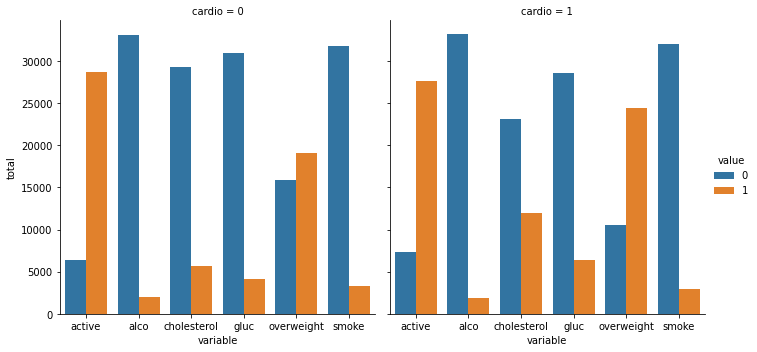

In [174]:
    fig = sns.catplot(
      x = 'variable',
      y = 'total',
      kind = 'bar',
      col = 'cardio',
      data = df1,
      hue="value"
    )

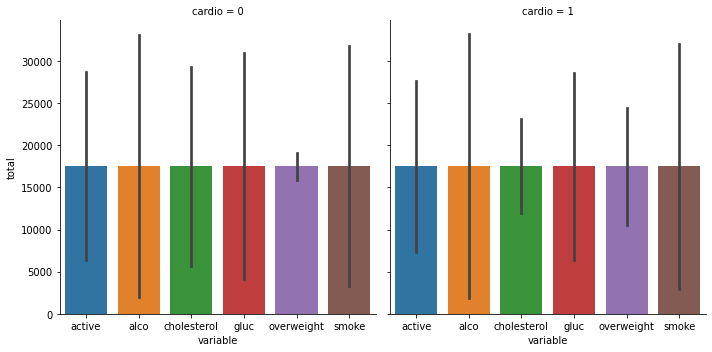

In [175]:
    fig = sns.catplot(
      x = 'variable',
      y = 'total',
      kind = 'bar',
      col = 'cardio',
      data = df1,
    )

In [177]:
fig.axes[0]

array([<AxesSubplot:title={'center':'cardio = 0'}, xlabel='variable', ylabel='total'>,
       <AxesSubplot:title={'center':'cardio = 1'}, xlabel='variable'>],
      dtype=object)

In [178]:
type(fig)

seaborn.axisgrid.FacetGrid

In [179]:
fig

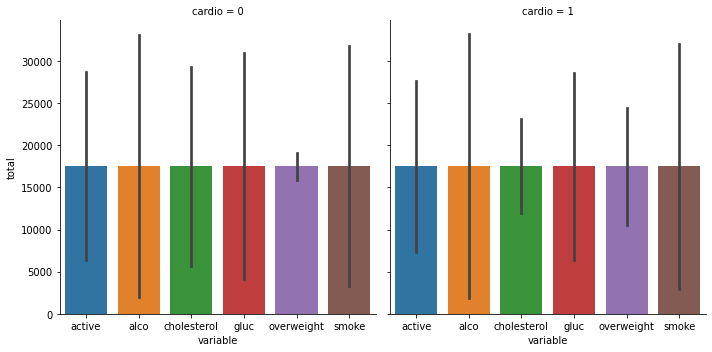

In [180]:
fig.fig